In [190]:
import pandas as pd
import scipy.stats as stats
from scipy.optimize import Bounds
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np

In [191]:
market_camp = pd.read_csv("marketing_campaign.csv", header=0)
market_camp.head()

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True


In [192]:
market_camp["variant"].unique()

array(['personalization', 'control'], dtype=object)

In [193]:
market_camp["conv_int"] = market_camp["converted"].apply(lambda x: 1 if x ==True else 0)
market_camp

,user_id,date_served,marketing_channel,variant,language_displayed,converted,conv_int
0,a1000,1/1/18,House Ads,personalization,English,True,1
1,a1001,1/1/18,House Ads,personalization,English,True,1
2,a1002,1/1/18,House Ads,personalization,English,True,1
3,a1003,1/1/18,House Ads,personalization,English,True,1
4,a1004,1/1/18,House Ads,personalization,English,True,1
...,...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True,1
10033,a11033,1/17/18,Email,control,German,True,1
10034,a11034,1/5/18,Instagram,control,German,False,0
10035,a11035,1/17/18,Email,control,German,True,1


In [194]:
df1 =pd.pivot_table(market_camp, index ="variant",columns="converted", values = "conv_int", aggfunc ="count")
df1

converted,False,True
variant,,
control,4705,371
personalization,4241,705


# Расчет значимости

In [195]:
result = stats.chi2_contingency(df1, correction=False)
chisq, pvalue = result [:2]

print(f"{chisq=}, {pvalue=}")

chisq=126.07767827548582, pvalue=2.9568009705199523e-29


### personalization имеет большую значимость, чем  control

# Оптимизация

In [196]:
def value(x):
    return -45*x[0]-80*x[1]

In [197]:
neq_cons ={"type" : "ineq",
           "fun" : lambda x : np.array([400 - 5*x[0] - 20*x[1],
                                        450 - 10*x[0] - 15*x[1]])
          }

In [198]:
x=[10,10]
value(x)

-1250

In [199]:
bnds = Bounds([0,0],[np.inf, np.inf])

In [200]:
x0 = np.array([15,15])
res = minimize(value, x0, method="SLSQP", constraints=neq_cons, bounds=bnds)
print (res.x)

[24. 14.]


In [201]:
print("Расход материала :", 5*24 + 20*14, "красного дерева")
print("Трудозтраты :", 10*24 + 15*14, "чел.*часов")
print("Максимальная прибыль:", -1*value([24,14]), "долларов")

Расход материала : 400 красного дерева
Трудозтраты : 450 чел.*часов
Максимальная прибыль: 2200 долларов


# Апроксимация

In [202]:
df = pd.DataFrame({"day" : [1,3,7,14,21,30],
                  "profit" : [0.4,0.6,0.8,1.1,1.3,1.4]})
df

,day,profit
0,1,0.4
1,3,0.6
2,7,0.8
3,14,1.1
4,21,1.3
5,30,1.4


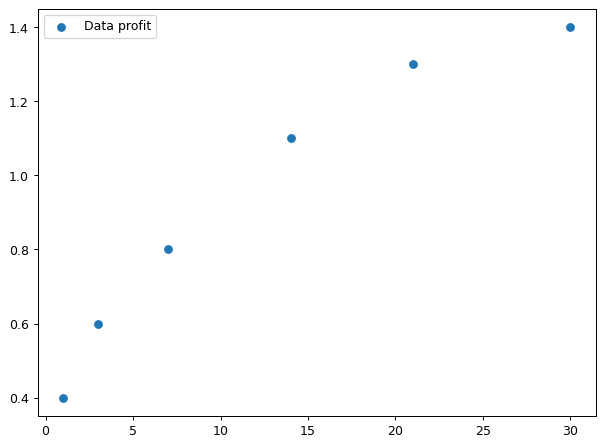

In [203]:
plt.figure(num=None, figsize=(8,6), dpi=90, facecolor="w", edgecolor="k")
plt.scatter(df["day"],df["profit"], label='Data profit')
plt.legend()
plt.show()

In [204]:
def degree_f(x,a,b):
    return a*b**x

def ln_f(x,a,b):
    return a*np.log(x)+b

In [205]:
degree_popt,degree_pcov = curve_fit(degree_f, df["day"], df["profit"])
print(degree_popt)

[0.60035711 1.03160017]


In [206]:
ln_popt,ln_pcov = curve_fit(ln_f, df["day"], df["profit"])
print(ln_popt)

[0.3042427  0.31829153]


In [207]:
degree_y_projection = degree_f(np.arange(0,100), *degree_popt)
ln_y_projection = ln_f(np.arange(0.1,100), *ln_popt)

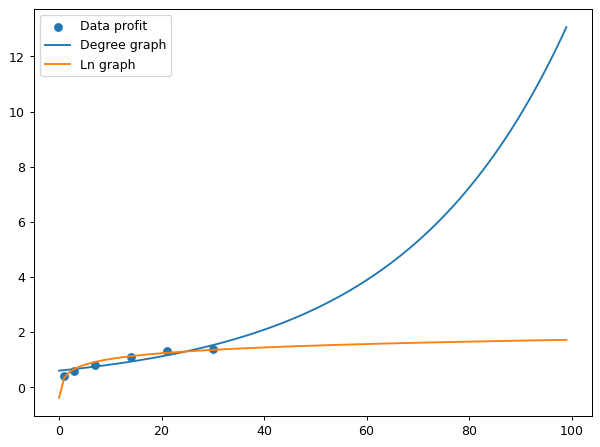

In [208]:
plt.figure(num=None, figsize=(8,6), dpi=90, facecolor="w", edgecolor="k")
plt.scatter(df["day"],df["profit"], label='Data profit')
plt.plot(degree_y_projection, label='Degree graph')
plt.plot(ln_y_projection, label='Ln graph')
plt.legend()
plt.show()

In [209]:
degree_pred = [degree_y_projection[i] for i in list(df["day"])] 
degree_pred

[0.6193285013669545,
 0.659088716032839,
 0.7464307044090908,
 0.9280456295448732,
 1.153849493904676,
 1.5266933282102846]

In [210]:
ln_pred = [ln_y_projection[i] for i in list(df["day"])] 
ln_pred

[0.3472889597284009,
 0.6625123615715319,
 0.9146360538199171,
 1.1233708862478993,
 1.246010582186312,
 1.354093448104905]

In [211]:
ln_f(90, *ln_popt)

1.687325756038148